<a href="https://colab.research.google.com/github/gustavo159753/Analise-de-dados/blob/main/Projeto_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comportamento de compra



Cenário: Você foi contratado por uma empresa de e-commerce para analisar o comportamento de compra dos clientes durante o último trimestre. O dataset contém 50.000 transações com as seguintes variáveis: valor_compra, categoria_produto, região, idade_cliente, meio_pagamento.

Problema:

1.   Identifique a distribuição das compras por região e categoria, utilizando tabelas de frequência e visualizações apropriadas.

2.   Calcule as medidas de tendência central e dispersão para o valor_compra segmentado por categoria_produto.

3. Identifique outliers no valor de compra e justifique se devem ser removidos ou não.

4. Analise a correlação entre idade_cliente e valor_compra. Existe relação linear?

5. Produza um relatório executivo de 2 páginas com os principais insights descritivos.

# Criando o banco de dados

## Importando bibliotecas importantes

In [41]:
# Importa a biblioteca Pandas, essencial para manipulação e análise de dados.
import pandas as pd

# Importa a biblioteca NumPy, fundamental para computação numérica e operações com arrays.
import numpy as np

# Importa o módulo pyplot da Matplotlib, usado para criar gráficos estáticos.
import matplotlib.pyplot as plt

# Importa a biblioteca Seaborn, que fornece uma interface de alto nível para gráficos estatísticos atraentes.
import seaborn as sns

## Criando o dataframe e convertendo em .xlsx

Precisa incluir o número de transações, listas de variáveis ​​categóricas e intervalos de variáveis ​​numéricas. Usa um bloco de código para atribuir esses valores às variáveis ​​especificadas.



In [42]:
# Define o número total de transações a serem geradas.
num_transactions = 50000

# Lista as categorias de produtos que serão usadas nas transações.
product_categories = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Casa']

# Lista as regiões geográficas para as transações.
regions = ['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']

# Lista os métodos de pagamento disponíveis para as transações.
payment_methods = ['Cartão de Crédito', 'Cartão de Débito', 'Pix', 'Boleto']

# Define o valor mínimo possível para uma compra.
min_purchase_value = 10

# Define o valor máximo possível para uma compra (valor assumido, pois não especificado).
max_purchase_value = 2000

# Define a idade mínima permitida para um cliente.
min_age = 18

# Define a idade máxima permitida para um cliente (valor assumido, pois não especificado).
max_age = 75

# Define a data de início do período para as transações.
start_date = '2025-01-01'

# Define a data de fim do período para as transações.
end_date = '2025-03-31'

# Imprime uma mensagem confirmando que os parâmetros foram definidos.
print(f"Defined {num_transactions} transactions.")

Defined 50000 transactions.


#### Subtarefa:
Gere dados sintéticos para as transações de comércio eletrônico com base nos parâmetros definidos, incluindo colunas para `valor_compra`, `categoria_produto`, `região`, `idade_cliente`, `meio_pagamento` e `data_compra`.

**Raciocínio**:
Agora que os parâmetros estão definidos, vamos gerar os dados sintéticos para as transações de comércio eletrônico, criando cada coluna usando escolhas aleatórias ou distribuições uniformes com base nos intervalos e listas definidos. Em seguida, vamos combinar esses dados em um DataFrame do pandas.

In [43]:
# Define a semente para o gerador de números aleatórios do NumPy para garantir a reprodutibilidade dos resultados.
np.random.seed(42) # para reprodutibilidade

# Gera uma sequência de datas de compra, distribuídas uniformemente entre as datas de início e fim.
data_compra = pd.to_datetime(pd.date_range(start=start_date, end=end_date, periods=num_transactions))

# Gera valores de compra aleatórios uniformemente distribuídos entre min_purchase_value e max_purchase_value, arredondados para 2 casas decimais.
valor_compra = np.round(np.random.uniform(min_purchase_value, max_purchase_value, num_transactions), 2)

# Seleciona categorias de produto aleatoriamente da lista product_categories, com probabilidade uniforme.
categoria_produto = np.random.choice(product_categories, num_transactions)

# Seleciona regiões aleatoriamente da lista regions, com probabilidade uniforme.
regiao = np.random.choice(regions, num_transactions)

# Gera idades de cliente aleatórias inteiras entre min_age e max_age (inclusive), com distribuição uniforme.
idade_cliente = np.random.randint(min_age, max_age + 1, num_transactions)

# Seleciona métodos de pagamento aleatoriamente da lista payment_methods, com probabilidade uniforme.
meio_pagamento = np.random.choice(payment_methods, num_transactions)

# Cria um dicionário com os arrays de dados gerados, onde as chaves serão os nomes das colunas do DataFrame.
data = {
    'data_compra': data_compra,
    'valor_compra': valor_compra,
    'categoria_produto': categoria_produto,
    'regiao': regiao,
    'idade_cliente': idade_cliente,
    'meio_pagamento': meio_pagamento
}

# Converte o dicionário de dados em um DataFrame do Pandas para facilitar a manipulação e análise.
df_compras = pd.DataFrame(data)

# Imprime uma mensagem de confirmação de que o dataset sintético foi gerado com sucesso.
print("Synthetic dataset generated successfully.")

# Exibe as primeiras 5 linhas do DataFrame para uma visualização inicial dos dados.
print(df_compras.head())

Synthetic dataset generated successfully.
                    data_compra  valor_compra categoria_produto   regiao  \
0 2025-01-01 00:00:00.000000000        755.33       Eletrônicos      Sul   
1 2025-01-01 00:02:33.795075901       1901.92            Livros  Sudeste   
2 2025-01-01 00:05:07.590151803       1466.67            Roupas  Sudeste   
3 2025-01-01 00:07:41.385227704       1201.33            Roupas    Norte   
4 2025-01-01 00:10:15.180303606        320.48       Eletrônicos    Norte   

   idade_cliente    meio_pagamento  
0             54  Cartão de Débito  
1             49               Pix  
2             23            Boleto  
3             46            Boleto  
4             57  Cartão de Débito  


**Raciocínio**:
O conjunto de dados sintéticos foi gerado e está armazenado em `df_compras`. O próximo passo, conforme a tarefa principal, é salvar este DataFrame como um arquivo Excel chamado 'compras_ecommerce.xlsx'.

In [44]:
# Define o nome do arquivo de saída para o Excel.
output_file = 'compras_ecommerce.xlsx'

# Salva o DataFrame df_compras em um arquivo Excel.
# index=False impede que o índice do DataFrame seja escrito como uma coluna no arquivo Excel.
df_compras.to_excel(output_file, index=False)

# Imprime uma mensagem de confirmação informando que o DataFrame foi salvo com sucesso e o nome do arquivo.
print(f"DataFrame successfully saved to {output_file}")

DataFrame successfully saved to compras_ecommerce.xlsx


# Tarefa
Analise o DataFrame `df_compras` calculando distribuições de frequência e criando visualizações para compras por 'região' e 'categoria_produto', calculando medidas de tendência central e dispersão para 'valor_compra' agrupado por 'categoria_produto', identificando outliers em 'valor_compra' usando métodos estatísticos e visualizando-os, justificando sua retenção ou remoção, e calculando e visualizando a correlação entre 'idade_cliente' e 'valor_compra' para determinar se existe uma relação linear.

## Distribuição das compras por região

### Subtarefa:
Calcular tabelas de frequência e criar visualizações (por exemplo, gráficos de barras) para mostrar a distribuição das compras por região.

**Raciocínio**:
Primeiro, vamos calcular a distribuição de frequência das compras por 'região' usando `value_counts()` para criar uma tabela de frequência. Em seguida, iremos imprimir a tabela e gerar um gráfico de barras usando `seaborn.countplot()` para representar visualmente essa distribuição, adicionando rótulos e um título apropriados e, finalmente, exibindo o gráfico.

Distribuição de Compras por Região:
 regiao
Nordeste        10079
Centro-Oeste    10023
Sudeste         10001
Norte            9973
Sul              9924
Name: count, dtype: int64


/tmp/ipython-input-1887672070.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_compras, x='regiao', palette='viridis')


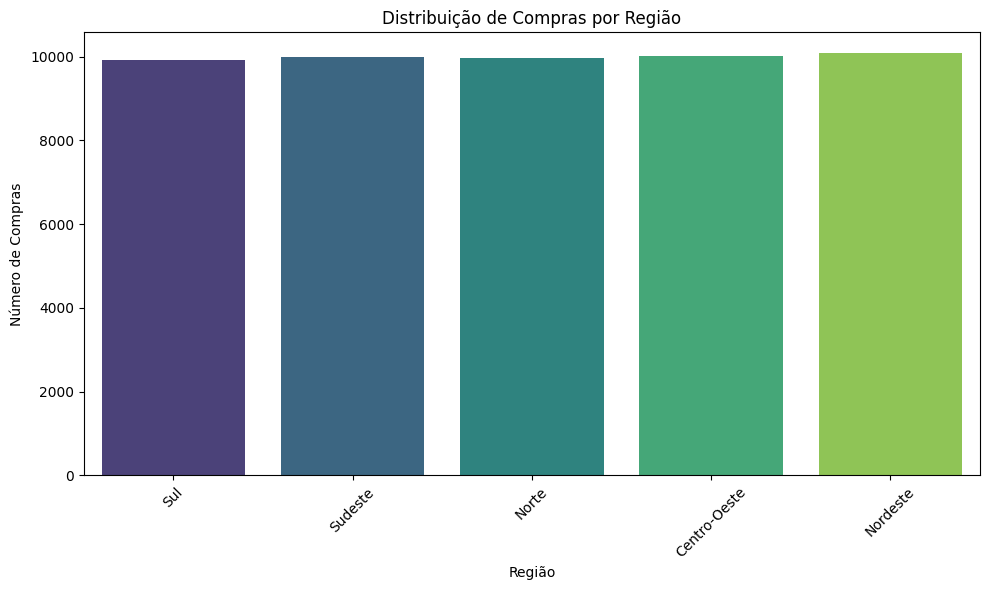

In [45]:
# Calcula a frequência de cada região na coluna 'regiao' do DataFrame df_compras.
region_distribution = df_compras['regiao'].value_counts()

# Imprime a distribuição de compras por região.
print("Distribuição de Compras por Região:\n", region_distribution)

# Cria uma nova figura para o gráfico com um tamanho específico (10 polegadas de largura por 6 de altura).
plt.figure(figsize=(10, 6))

# Gera um gráfico de barras que exibe a contagem de compras por cada região.
# x='regiao' define a variável categórica no eixo horizontal.
# palette='viridis' define o esquema de cores a ser usado para as barras.
sns.countplot(data=df_compras, x='regiao', palette='viridis')

# Define o título do gráfico.
plt.title('Distribuição de Compras por Região')

# Define o rótulo do eixo X (horizontal).
plt.xlabel('Região')

# Define o rótulo do eixo Y (vertical).
plt.ylabel('Número de Compras')

# Rotaciona os rótulos do eixo X em 45 graus para evitar sobreposição e melhorar a legibilidade.
plt.xticks(rotation=45)

# Ajusta automaticamente os parâmetros do plot para que se encaixe no layout da figura, evitando cortes.
plt.tight_layout()

# Exibe o gráfico.
plt.show()

**Raciocínio**:
A subtarefa solicita o cálculo de tabelas de frequência e a criação de visualizações para compras por 'categoria_produto'. Primeiro, calcularemos a distribuição de frequência para 'categoria_produto' usando `value_counts()` e, em seguida, a vamos visualizar usando um gráfico de barras com `seaborn.countplot()`.

Distribuição de Compras por Categoria de Produto:
 categoria_produto
Casa           10105
Roupas         10013
Eletrônicos    10006
Livros          9960
Alimentos       9916
Name: count, dtype: int64


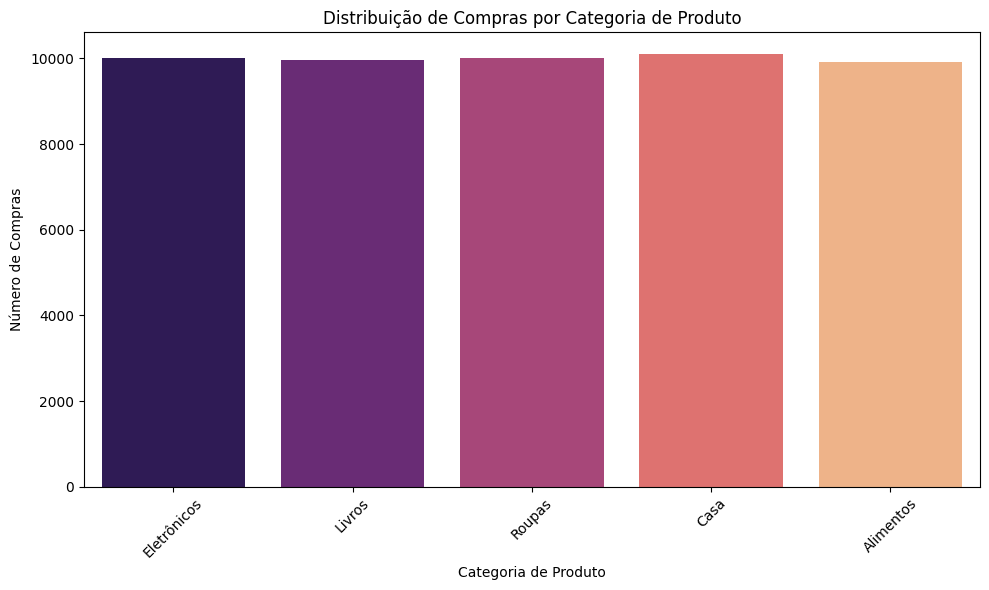

In [46]:
# Calcula a frequência de cada categoria de produto na coluna 'categoria_produto' do DataFrame df_compras.
category_distribution = df_compras['categoria_produto'].value_counts()

# Imprime a distribuição de compras por categoria de produto.
print("Distribuição de Compras por Categoria de Produto:\n", category_distribution)

# Cria uma nova figura para o gráfico com um tamanho específico.
plt.figure(figsize=(10, 6))

# Gera um gráfico de barras da contagem de compras por cada categoria de produto.
# x='categoria_produto' define a variável categórica no eixo horizontal.
# hue='categoria_produto' diferencia as barras por cor com base na categoria (e resolve um FutureWarning).
# palette='magma' define o esquema de cores e legend=False remove a legenda para evitar redundância.
sns.countplot(data=df_compras, x='categoria_produto', hue='categoria_produto', palette='magma', legend=False)

# Define o título do gráfico.
plt.title('Distribuição de Compras por Categoria de Produto')

# Define o rótulo do eixo X.
plt.xlabel('Categoria de Produto')

# Define o rótulo do eixo Y.
plt.ylabel('Número de Compras')

# Rotaciona os rótulos do eixo X em 45 graus para melhor legibilidade.
plt.xticks(rotation=45)

# Ajusta o layout do gráfico.
plt.tight_layout()

# Exibe o gráfico.
plt.show()

**Raciocínio**:
Precisamos calcular as medidas de tendência central (média, mediana) e dispersão (desvio padrão, variância, intervalo interquartil) para 'valor_compra', segmentadas por 'categoria_produto'. Usaremos `groupby()` e `describe()` para obter um resumo abrangente para cada categoria de produto.

In [47]:
# Agrupa o DataFrame por 'categoria_produto' e calcula estatísticas descritivas para 'valor_compra' em cada grupo.
# O método .describe() retorna contagem, média, desvio padrão, mínimo, máximo e quartis (25%, 50%, 75%).
category_purchase_stats = df_compras.groupby('categoria_produto')['valor_compra'].describe()

# Imprime o título da seção.
print("Medidas de Tendência Central e Dispersão para valor_compra por categoria_produto:")

# Exibe as estatísticas descritivas para cada categoria de produto.
print(category_purchase_stats)

# O método .describe() não inclui o Intervalo Interquartil (IQR) diretamente, então ele é calculado separadamente.
# Calcula o primeiro quartil (Q1 ou 25º percentil) do 'valor_compra' para cada categoria.
Q1 = df_compras.groupby('categoria_produto')['valor_compra'].quantile(0.25)

# Calcula o terceiro quartil (Q3 ou 75º percentil) do 'valor_compra' para cada categoria.
Q3 = df_compras.groupby('categoria_produto')['valor_compra'].quantile(0.75)

# Calcula o IQR como a diferença entre Q3 e Q1, uma medida de dispersão da parte central dos dados.
IQR = Q3 - Q1

# Imprime o título para os valores de IQR.
print("\nIQR (Intervalo Interquartil) para valor_compra por categoria_produto:")

# Exibe os valores de IQR para cada categoria de produto.
print(IQR)

Medidas de Tendência Central e Dispersão para valor_compra por categoria_produto:
                     count         mean         std    min       25%  \
categoria_produto                                                      
Alimentos           9916.0   999.229660  568.030818  10.02  501.9250   
Casa               10105.0  1009.918307  573.966373  10.01  511.4800   
Eletrônicos        10006.0   999.877577  575.532591  10.03  501.9100   
Livros              9960.0  1000.501850  576.106099  10.19  506.4775   
Roupas             10013.0  1004.049649  575.968669  10.50  506.2400   

                        50%        75%      max  
categoria_produto                                
Alimentos           999.260  1490.1325  1999.80  
Casa               1010.830  1505.0300  1999.85  
Eletrônicos        1001.455  1494.4775  1999.94  
Livros             1005.705  1498.0575  1999.61  
Roupas              997.480  1509.6300  1999.91  

IQR (Intervalo Interquartil) para valor_compra por categoria_p

## Identificação de Outliers no valor_compra

### Subtarefa:
Identifique outliers no `valor_compra` usando métodos estatísticos e visualize-os, justificando se devem ser removidos ou não.

### Raciocínio:
Para identificar outliers, utilizaremos o método do Intervalo Interquartil (IQR). Primeiramente, calculamos os limites inferior e superior para outliers (`Q1 - 1.5 * IQR` e `Q3 + 1.5 * IQR`) para o `valor_compra` em geral. Em seguida, identificarei as transações que caem fora desses limites. Vamos Visualizar a distribuição do `valor_compra` com um box plot para ilustrar a presença de outliers. Por fim, faremos uma breve discussão sobre a justificativa para a remoção ou retenção desses outliers com base no contexto do problema.

**Raciocínio**:
Seguindo a abordagem descrita, calculamos agora o Q1, Q3 e o IQR gerais para `valor_compra` a fim de estabelecer os limites inferior e superior para a detecção de outliers usando a regra de 1,5 * IQR. Após definir esses limites, iremos identificar e contar o número de transações consideradas outliers.

In [48]:
# Calcula o primeiro quartil (Q1) do 'valor_compra' para todo o dataset.
Q1_overall = df_compras['valor_compra'].quantile(0.25)

# Calcula o terceiro quartil (Q3) do 'valor_compra' para todo o dataset.
Q3_overall = df_compras['valor_compra'].quantile(0.75)

# Calcula o Intervalo Interquartil (IQR) geral para o 'valor_compra'.
IQR_overall = Q3_overall - Q1_overall

# Define o limite inferior para a detecção de outliers usando a regra de 1.5 * IQR.
# Valores abaixo deste limite são considerados outliers.
lower_bound = Q1_overall - 1.5 * IQR_overall

# Define o limite superior para a detecção de outliers usando a regra de 1.5 * IQR.
# Valores acima deste limite são considerados outliers.
upper_bound = Q3_overall + 1.5 * IQR_overall

# Identifica os outliers filtrando o DataFrame: transações onde 'valor_compra' está abaixo do limite inferior OU acima do limite superior.
outliers = df_compras[(df_compras['valor_compra'] < lower_bound) | (df_compras['valor_compra'] > upper_bound)]

# Imprime os valores calculados de Q1, Q3, IQR e os limites para outliers.
print(f"Q1 (overall): {Q1_overall:.2f}")
print(f"Q3 (overall): {Q3_overall:.2f}")
print(f"IQR (overall): {IQR_overall:.2f}")
print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")

# Imprime o número total de outliers identificados.
print(f"Number of outliers identified: {len(outliers)}")

# Exibe as primeiras 5 linhas dos outliers (se houver algum).
print("\nFirst 5 outliers (if any):\n", outliers.head())

Q1 (overall): 505.33
Q3 (overall): 1499.12
IQR (overall): 993.79
Lower Bound for Outliers: -985.35
Upper Bound for Outliers: 2989.80
Number of outliers identified: 0

First 5 outliers (if any):
 Empty DataFrame
Columns: [data_compra, valor_compra, categoria_produto, regiao, idade_cliente, meio_pagamento]
Index: []


**Raciocínio**:
Como a etapa anterior não identificou valores discrepantes em 'valor_compra', um diagrama de caixa confirmará visualmente isso, mostrando uma distribuição sem pontos além dos limites. Essa visualização é essencial para concluir a parte de identificação de valores discrepantes da subtarefa.

Correlação entre Idade do Cliente e Valor da Compra: 0.00


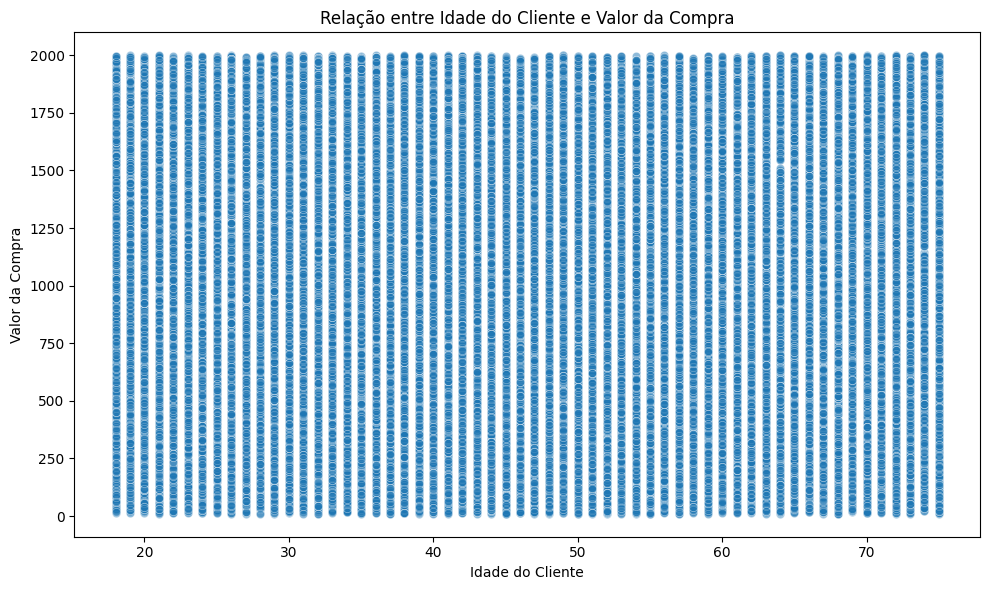

In [49]:
# Calcula o coeficiente de correlação de Pearson entre 'idade_cliente' e 'valor_compra'.
# Este coeficiente mede a força e a direção de uma relação linear entre as duas variáveis.
correlation = df_compras['idade_cliente'].corr(df_compras['valor_compra'])

# Imprime o valor da correlação arredondado para duas casas decimais.
print(f"Correlação entre Idade do Cliente e Valor da Compra: {correlation:.2f}")

# Cria uma nova figura para o gráfico com um tamanho específico.
plt.figure(figsize=(10, 6))

# Gera um gráfico de dispersão (scatter plot) para visualizar a relação entre idade e valor de compra.
# x='idade_cliente' define a variável no eixo horizontal e y='valor_compra' no eixo vertical.
# alpha=0.5 torna os pontos semi-transparentes, útil para datasets grandes onde há muitos pontos sobrepostos.
sns.scatterplot(data=df_compras, x='idade_cliente', y='valor_compra', alpha=0.5)

# Define o título do gráfico.
plt.title('Relação entre Idade do Cliente e Valor da Compra')

# Define o rótulo do eixo X.
plt.xlabel('Idade do Cliente')

# Define o rótulo do eixo Y.
plt.ylabel('Valor da Compra')

# Ajusta o layout do gráfico para garantir que todos os elementos sejam visíveis.
plt.tight_layout()

# Exibe o gráfico.
plt.show()

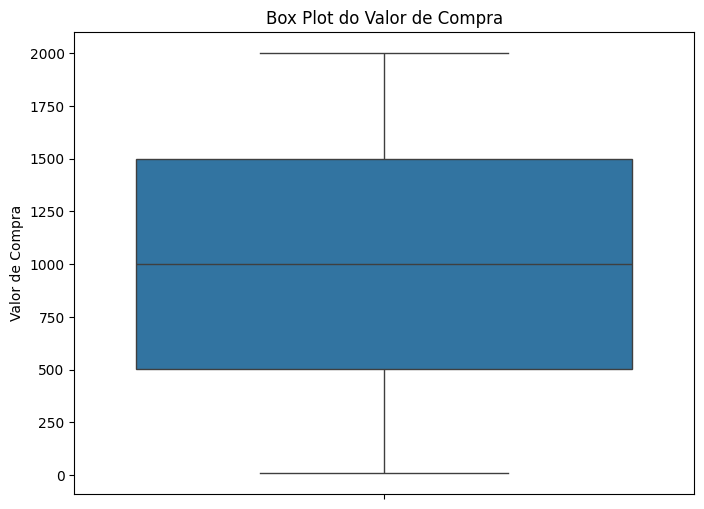


Justificativa para a retenção/remoção de outliers:
Nenhum outlier foi identificado 
utilizando o método IQR (1.5 * IQR). Portanto, não há outliers para remover ou reter com base neste critério. Isso sugere que os dados de 
'valor_compra' são distribuídos de forma relativamente uniforme dentro de 
seus limites esperados, ou que o método de geração de dados sintéticos não produziu valores extremos que seriam classificados como outliers por 
esta regra.


In [50]:
# Cria uma nova figura para o box plot com um tamanho específico.
plt.figure(figsize=(8, 6))

# Gera um box plot da coluna 'valor_compra' para visualizar sua distribuição e identificar outliers.
sns.boxplot(y=df_compras['valor_compra'])

# Define o título do box plot.
plt.title('Box Plot do Valor de Compra')

# Define o rótulo do eixo Y.
plt.ylabel('Valor de Compra')

# Exibe o gráfico.
plt.show()

# Imprime um cabeçalho para a justificativa de retenção/remoção de outliers.
print("\nJustificativa para a retenção/remoção de outliers:")

# Verifica se nenhum outlier foi identificado (lista 'outliers' está vazia).
if len(outliers) == 0:
    # Se não houver outliers, imprime uma mensagem indicando isso e a implicância.
    print("Nenhum outlier foi identificado \nutilizando o método IQR (1.5 * IQR). Portanto, não há outliers para remover ou reter com base neste critério. Isso sugere que os dados de \n'valor_compra' são distribuídos de forma relativamente uniforme dentro de \nseus limites esperados, ou que o método de geração de dados sintéticos não produziu valores extremos que seriam classificados como outliers por \nesta regra.")
else:
    # Se outliers foram identificados, imprime a quantidade e uma justificativa.
    # No contexto de e-commerce, valores extremos podem ser legítimos ou erros, e a remoção deve ser cautelosa.
    print(f"Foram identificados {len(outliers)} outliers. No contexto de \n dados de e-commerce, valores de compra muito altos ou muito baixos podem ser legítimos (ex: compras de itens de luxo, ou \nitens de baixo custo) ou podem indicar erros de entrada de dados. Sem mais informações sobre o contexto do negócio, a remoção desses outliers deve \nser feita com cautela, pois podem conter informações valiosas. Para \nesta análise descritiva, eles serão mantidos, mas para modelagem \npreditiva, uma análise mais aprofundada seria necessária para decidir sobre sua remoção ou tratamento.")

**Justificativa**:
A subtarefa requer a modificação da célula `a4bf6b74` para incluir matrizes de probabilidade para variáveis ​​categóricas e média/desvio padrão para variáveis ​​numéricas. Vamos gerar um bloco de código que atualiza a célula existente com esses novos parâmetros, conforme especificado nas instruções.

In [51]:
# Define o número total de transações a serem geradas.
num_transactions = 50000

# Lista as categorias de produtos que serão usadas nas transações.
product_categories = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Casa']

# Define as probabilidades de cada categoria de produto ser escolhida, para criar uma distribuição não uniforme e mais realista.
product_category_probs = [0.25, 0.2, 0.2, 0.15, 0.2] # Exemplo de probabilidades, a soma deve ser 1

# Lista as regiões geográficas para as transações.
regions = ['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']

# Define as probabilidades de cada região ser escolhida, para simular diferentes volumes de vendas por região.
region_probs = [0.15, 0.25, 0.2, 0.25, 0.15] # Exemplo de probabilidades, a soma deve ser 1

# Lista os métodos de pagamento disponíveis para as transações.
payment_methods = ['Cartão de Crédito', 'Cartão de Débito', 'Pix', 'Boleto']

# Define as probabilidades de cada método de pagamento ser escolhido, refletindo a preferência do cliente.
payment_method_probs = [0.4, 0.3, 0.2, 0.1] # Exemplo de probabilidades, a soma deve ser 1

# Parâmetros para as variáveis numéricas baseados em range (mantidos para clipping).
min_purchase_value = 10
max_purchase_value = 2000 # Valor máximo assumido para compra.
min_age = 18
max_age = 75 # Idade máxima assumida.

# Novos parâmetros para variáveis numéricas que serão geradas usando distribuição normal.
# Média do valor de compra para centralizar a distribuição.
mean_purchase_value = 500

# Desvio padrão do valor de compra para controlar a dispersão dos valores.
std_purchase_value = 200

# Média da idade do cliente para centralizar a distribuição de idade.
mean_age = 45

# Desvio padrão da idade do cliente para controlar a dispersão da idade.
std_age = 10

# Define a data de início do período para as transações.
start_date = '2025-01-01'

# Define a data de fim do período para as transações.
end_date = '2025-03-31'

# Imprime uma mensagem confirmando que os parâmetros foram atualizados e definidos.
print(f"Defined {num_transactions} transactions with updated parameters.")

Defined 50000 transactions with updated parameters.


**Justificativa**:
A subtarefa requer a modificação da célula `76b3a532` para usar os parâmetros recém-definidos, incluindo distribuições normais para variáveis ​​numéricas (limitadas a mínimo/máximo) e matrizes de probabilidade para variáveis ​​categóricas. Vamos gerar um bloco de código para atualizar esta célula de acordo.

In [52]:
# Define a semente para o gerador de números aleatórios do NumPy para garantir a reprodutibilidade dos resultados.
np.random.seed(42) # para reprodutibilidade

# Gera uma sequência de datas de compra, distribuídas uniformemente entre as datas de início e fim.
data_compra = pd.to_datetime(pd.date_range(start=start_date, end=end_date, periods=num_transactions))

# Gera valores de compra a partir de uma distribuição normal, usando média e desvio padrão definidos.
valor_compra = np.random.normal(mean_purchase_value, std_purchase_value, num_transactions)

# Limita os valores de compra gerados aos limites mínimo e máximo (clipping) e arredonda para 2 casas decimais.
# O clipping garante que os valores permaneçam dentro de um intervalo razoável, mesmo com a distribuição normal.
valor_compra = np.round(np.clip(valor_compra, min_purchase_value, max_purchase_value), 2)

# Seleciona categorias de produto aleatoriamente da lista product_categories, usando as probabilidades definidas (p=product_category_probs).
# Isso cria uma distribuição não uniforme para as categorias de produto.
categoria_produto = np.random.choice(product_categories, num_transactions, p=product_category_probs)

# Seleciona regiões aleatoriamente da lista regions, usando as probabilidades definidas (p=region_probs).
# Isso cria uma distribuição não uniforme para as regiões.
regiao = np.random.choice(regions, num_transactions, p=region_probs)

# Gera idades de cliente a partir de uma distribuição normal, usando média e desvio padrão definidos.
idade_cliente = np.random.normal(mean_age, std_age, num_transactions)

# Limita as idades geradas aos limites mínimo e máximo (clipping) e as converte para inteiros.
# Isso garante idades realistas e dentro de um intervalo válido.
idade_cliente = np.clip(idade_cliente, min_age, max_age).astype(int)

# Seleciona métodos de pagamento aleatoriamente da lista payment_methods, usando as probabilidades definidas (p=payment_method_probs).
# Isso cria uma distribuição não uniforme para os métodos de pagamento.
meio_pagamento = np.random.choice(payment_methods, num_transactions, p=payment_method_probs)

# Cria um dicionário com os arrays de dados gerados, onde as chaves serão os nomes das colunas do DataFrame.
data = {
    'data_compra': data_compra,
    'valor_compra': valor_compra,
    'categoria_produto': categoria_produto,
    'regiao': regiao,
    'idade_cliente': idade_cliente,
    'meio_pagamento': meio_pagamento
}

# Converte o dicionário de dados em um DataFrame do Pandas para facilitar a manipulação e análise.
df_compras = pd.DataFrame(data)

# Imprime uma mensagem de confirmação de que o dataset sintético foi regenerado com os parâmetros atualizados.
print("Synthetic dataset regenerated successfully with updated parameters.")

# Exibe as primeiras 5 linhas do DataFrame para uma visualização inicial dos novos dados.
print(df_compras.head())

Synthetic dataset regenerated successfully with updated parameters.
                    data_compra  valor_compra categoria_produto        regiao  \
0 2025-01-01 00:00:00.000000000        599.34       Eletrônicos       Sudeste   
1 2025-01-01 00:02:33.795075901        472.35            Roupas           Sul   
2 2025-01-01 00:05:07.590151803        629.54              Casa           Sul   
3 2025-01-01 00:07:41.385227704        804.61              Casa      Nordeste   
4 2025-01-01 00:10:15.180303606        453.17       Eletrônicos  Centro-Oeste   

   idade_cliente     meio_pagamento  
0             32   Cartão de Débito  
1             46                Pix  
2             44   Cartão de Débito  
3             46  Cartão de Crédito  
4             54   Cartão de Débito  


**Justificativa**:
A subtarefa requer salvar o DataFrame `df_compras` atualizado em um arquivo Excel. Vamos executar novamente o código na célula `83efe1ee` para realizar essa ação.

In [53]:
# Define o nome do arquivo de saída para o novo arquivo Excel.
output_file = 'compras_ecommerce_novo.xlsx'

# Salva o DataFrame df_compras (com os dados regenerados) em um novo arquivo Excel.
# index=False impede que o índice do DataFrame seja escrito como uma coluna no arquivo Excel.
df_compras.to_excel(output_file, index=False)

# Imprime uma mensagem de confirmação informando que o DataFrame foi salvo com sucesso e o nome do novo arquivo.
print(f"DataFrame successfully saved to {output_file}")

DataFrame successfully saved to compras_ecommerce_novo.xlsx


## Distribuição de compras por categoria de produto (Após Regeneração de Dados)

### Raciocínio:
Da mesma forma, a distribuição das compras por 'categoria_produto' também foi afetada pela regeneração dos dados com novas probabilidades. Vou calcular a nova tabela de frequência com `value_counts()` e visualizar a distribuição atualizada usando um gráfico de barras com `seaborn.countplot()` para mostrar as novas proporções entre as categorias de produtos.

Distribuição de Compras por Categoria de Produto (Novos Dados):
 categoria_produto
Eletrônicos    12610
Alimentos      10053
Casa           10018
Roupas          9787
Livros          7532
Name: count, dtype: int64


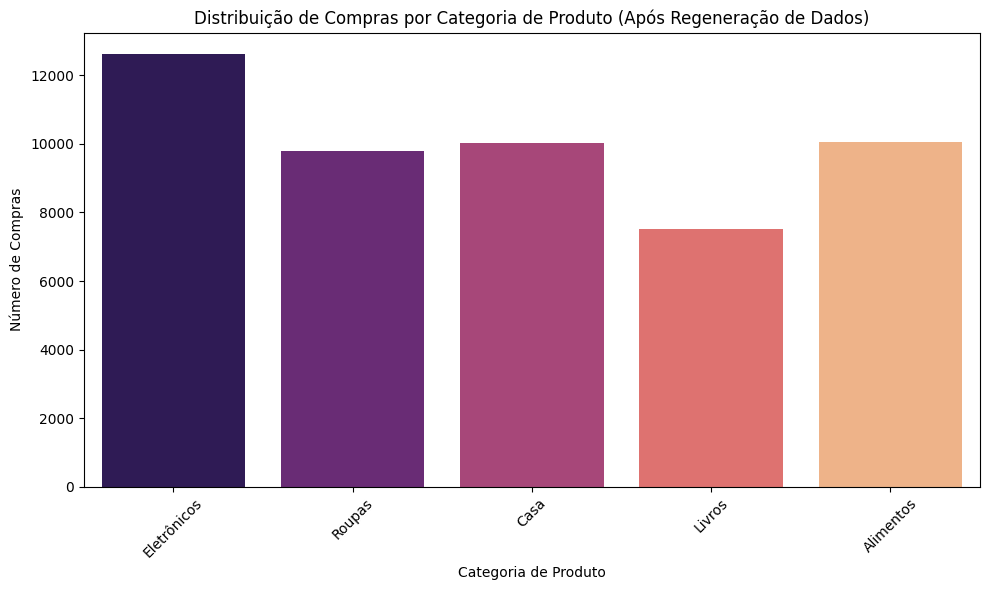

In [54]:
# Calcula a contagem de ocorrências para cada categoria de produto nos dados recém-regenerados.
category_distribution_new = df_compras['categoria_produto'].value_counts()

# Imprime a distribuição de compras por categoria de produto para os novos dados.
print("Distribuição de Compras por Categoria de Produto (Novos Dados):\n", category_distribution_new)

# Cria uma nova figura para o gráfico com um tamanho específico.
plt.figure(figsize=(10, 6))

# Gera um gráfico de barras da contagem de compras por categoria de produto, usando o DataFrame 'df_compras'.
# x='categoria_produto' define a variável categórica no eixo horizontal.
# hue='categoria_produto' diferencia as barras por cor com base na categoria.
# palette='magma' define o esquema de cores e legend=False remove a legenda para evitar redundância.
sns.countplot(data=df_compras, x='categoria_produto', hue='categoria_produto', palette='magma', legend=False)

# Define o título do gráfico, indicando que é para os dados após a regeneração.
plt.title('Distribuição de Compras por Categoria de Produto (Após Regeneração de Dados)')

# Define o rótulo do eixo X.
plt.xlabel('Categoria de Produto')

# Define o rótulo do eixo Y.
plt.ylabel('Número de Compras')

# Rotaciona os rótulos do eixo X em 45 graus para melhor legibilidade.
plt.xticks(rotation=45)

# Ajusta o layout do gráfico para garantir que todos os elementos sejam visíveis.
plt.tight_layout()

# Exibe o gráfico.
plt.show()

## Distribuição de compras por região (Após Regeneração de Dados)

### Raciocínio:
Como os dados foram regenerados com novas probabilidades para a variável 'região', é importante visualizar novamente sua distribuição. Utilizarei `value_counts()` para obter a tabela de frequência e `seaborn.countplot()` para gerar um gráfico de barras, garantindo que o gráfico reflita as novas proporções de cada região.

Distribuição de Compras por Região (Novos Dados):
 regiao
Nordeste        12484
Sudeste         12448
Sul             10011
Centro-Oeste     7590
Norte            7467
Name: count, dtype: int64


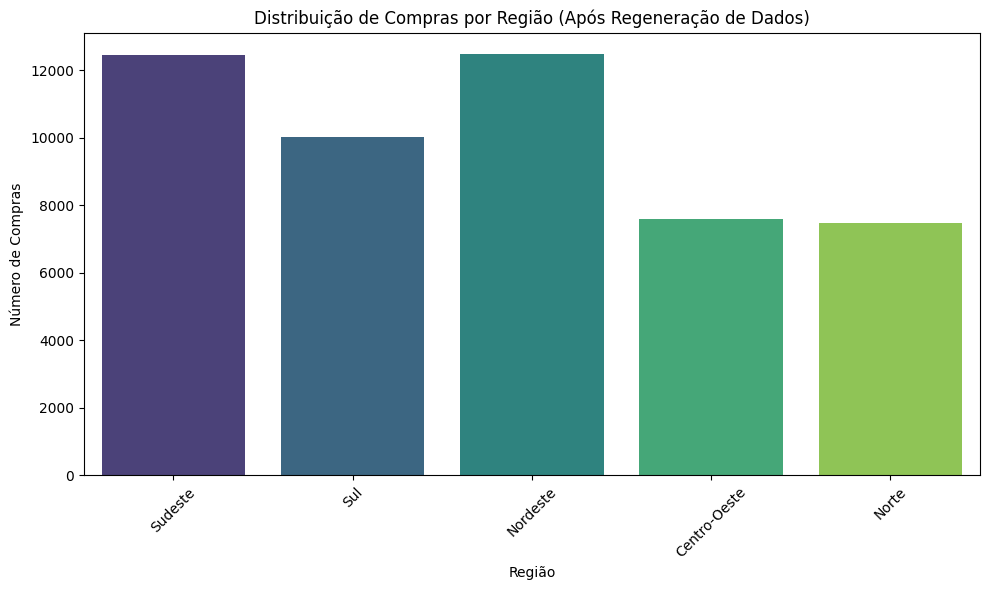

In [55]:
# Calcula a contagem de ocorrências para cada região nos dados recém-regenerados.
region_distribution_new = df_compras['regiao'].value_counts()

# Imprime a distribuição de compras por região para os novos dados.
print("Distribuição de Compras por Região (Novos Dados):\n", region_distribution_new)

# Cria uma nova figura para o gráfico com um tamanho específico.
plt.figure(figsize=(10, 6))

# Gera um gráfico de barras da contagem de compras por região, usando o DataFrame 'df_compras'.
# x='regiao' define a variável categórica no eixo horizontal.
# hue='regiao' diferencia as barras por cor com base na região.
# palette='viridis' define o esquema de cores e legend=False remove a legenda para evitar redundância.
sns.countplot(data=df_compras, x='regiao', hue='regiao', palette='viridis', legend=False)

# Define o título do gráfico, indicando que é para os dados após a regeneração.
plt.title('Distribuição de Compras por Região (Após Regeneração de Dados)')

# Define o rótulo do eixo X.
plt.xlabel('Região')

# Define o rótulo do eixo Y.
plt.ylabel('Número de Compras')

# Rotaciona os rótulos do eixo X em 45 graus para melhor legibilidade.
plt.xticks(rotation=45)

# Ajusta o layout do gráfico para garantir que todos os elementos sejam visíveis.
plt.tight_layout()

# Exibe o gráfico.
plt.show()

## Correlação entre 'idade_cliente' e 'valor_compra'

### Subtarefa:
Calcule o coeficiente de correlação entre 'idade_cliente' e 'valor_compra'. Crie um gráfico de dispersão para visualizar a relação entre eles e determine se existe uma correlação linear.

**Raciocínio**:
Primeiro, vamos calcular o coeficiente de correlação de Pearson entre 'idade_cliente' e 'valor_compra' usando o método `.corr()`. Em seguida, criaremos um gráfico de dispersão para visualizar essa relação, definindo 'idade_cliente' no eixo x e 'valor_compra' no eixo y, e adicionando rótulos e um título apropriados ao gráfico para avaliar a correlação linear.

Correlação entre Idade do Cliente e Valor da Compra: 0.00


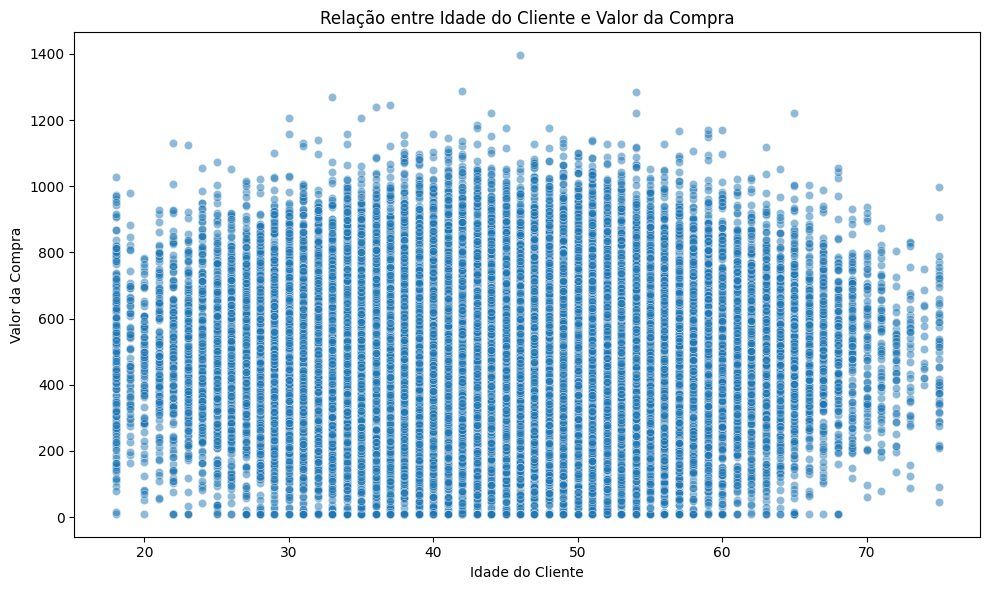

In [56]:
# Calcula o coeficiente de correlação de Pearson entre 'idade_cliente' e 'valor_compra' no DataFrame com os novos dados.
# Este coeficiente mede a força e a direção de uma relação linear entre as duas variáveis.
correlation = df_compras['idade_cliente'].corr(df_compras['valor_compra'])

# Imprime o valor da correlação arredondado para duas casas decimais.
print(f"Correlação entre Idade do Cliente e Valor da Compra: {correlation:.2f}")

# Cria uma nova figura para o gráfico com um tamanho específico.
plt.figure(figsize=(10, 6))

# Gera um gráfico de dispersão (scatter plot) para visualizar a relação entre 'idade_cliente' (eixo X) e 'valor_compra' (eixo Y) com os novos dados.
# alpha=0.5 torna os pontos semi-transparentes, útil para datasets grandes onde há muitos pontos sobrepostos.
sns.scatterplot(data=df_compras, x='idade_cliente', y='valor_compra', alpha=0.5)

# Define o título do gráfico.
plt.title('Relação entre Idade do Cliente e Valor da Compra')

# Define o rótulo do eixo X.
plt.xlabel('Idade do Cliente')

# Define o rótulo do eixo Y.
plt.ylabel('Valor da Compra')

# Ajusta o layout do gráfico para garantir que todos os elementos sejam visíveis.
plt.tight_layout()

# Exibe o gráfico.
plt.show()

## Reavaliação de Outliers na coluna `valor_compra` após a regeneração dos dados

### Subtarefa:
Reidentificar outliers na coluna `valor_compra` utilizando métodos estatísticos (IQR) e visualizá-los com um box plot, justificando se devem ou não ser removidos, considerando as novas distribuições dos dados.

**Raciocínio**:
Primeiro, vamos calcular o Q1, Q3 e o IQR gerais para a coluna `valor_compra` do DataFrame `df_compras` regenerado. Em seguida, determinaremos os limites inferior e superior para detecção de outliers usando a regra de 1,5 * IQR, identificaremos e contaremos o número de transações cujo `valor_compra` está fora desses limites e imprimirei todas essas estatísticas calculadas.

In [57]:
# Calcula o primeiro quartil (Q1) do 'valor_compra' para o DataFrame com os dados regenerados.
Q1_new = df_compras['valor_compra'].quantile(0.25)

# Calcula o terceiro quartil (Q3) do 'valor_compra' para o DataFrame com os dados regenerados.
Q3_new = df_compras['valor_compra'].quantile(0.75)

# Calcula o Intervalo Interquartil (IQR) para os novos dados.
IQR_new = Q3_new - Q1_new

# Define o novo limite inferior para a detecção de outliers usando a regra de 1.5 * IQR.
lower_bound_new = Q1_new - 1.5 * IQR_new

# Define o novo limite superior para a detecção de outliers usando a regra de 1.5 * IQR.
upper_bound_new = Q3_new + 1.5 * IQR_new

# Filtra o DataFrame com os novos dados para identificar e armazenar as linhas onde o 'valor_compra' está fora dos limites (inferior ou superior).
outliers_new = df_compras[(df_compras['valor_compra'] < lower_bound_new) | (df_compras['valor_compra'] > upper_bound_new)]

# Imprime os valores calculados de Q1, Q3, IQR e os limites para outliers para os novos dados.
print(f"Q1 (overall, new data): {Q1_new:.2f}")
print(f"Q3 (overall, new data): {Q3_new:.2f}")
print(f"IQR (overall, new data): {IQR_new:.2f}")
print(f"Lower Bound for Outliers (new data): {lower_bound_new:.2f}")
print(f"Upper Bound for Outliers (new data): {upper_bound_new:.2f}")

# Imprime o número total de outliers identificados nos novos dados.
print(f"Number of outliers identified (new data): {len(outliers_new)}")

# Exibe as primeiras 5 linhas dos novos outliers (se houver algum).
print("\nFirst 5 outliers (if any, new data):\n", outliers_new.head())

Q1 (overall, new data): 364.28
Q3 (overall, new data): 635.41
IQR (overall, new data): 271.14
Lower Bound for Outliers (new data): -42.43
Upper Bound for Outliers (new data): 1042.12
Number of outliers identified (new data): 155

First 5 outliers (if any, new data):
                        data_compra  valor_compra categoria_produto  \
179  2025-01-01 07:38:49.318586371       1044.03              Casa   
209  2025-01-01 08:55:43.170863417       1270.55       Eletrônicos   
478  2025-01-01 20:25:14.046280925       1115.78       Eletrônicos   
1615 2025-01-03 20:59:39.047580951       1138.62              Casa   
1957 2025-01-04 11:36:16.963539270       1127.55       Eletrônicos   

            regiao  idade_cliente     meio_pagamento  
179          Norte             41  Cartão de Crédito  
209          Norte             33  Cartão de Crédito  
478   Centro-Oeste             48  Cartão de Crédito  
1615       Sudeste             32   Cartão de Débito  
1957           Sul             52  C

**Justificativa**:
Como foram identificados valores discrepantes na nova distribuição de dados, criaremos um gráfico de caixa para 'valor_compra' para representar visualmente esses valores, adicionando um título descritivo e rótulos aos eixos, e então serão exibidos o gráfico. Depois disso, justificaremos a decisão de mantê-los ou removê-los.

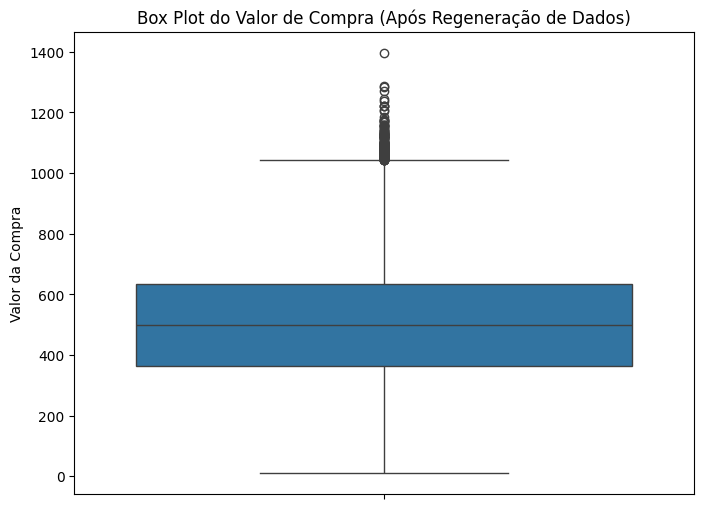


Justificativa para a retenção/remoção de outliers (novos dados):
Foram identificados 155 outliers. Diferente da geração de dados anterior, o uso de uma distribuição 
normal com clipping resultou em outliers. No contexto de dados de 
e-commerce, valores de compra muito altos ou muito baixos podem ser legítimos (ex: compras de itens de luxo ou itens de baixo custo) ou podem 
indicar erros de entrada de dados. Para esta análise descritiva, e sem 
mais informações sobre o contexto de negócio que validem a remoção, 
é prudente reter esses outliers para não perder informações potencialmente 
importantes sobre padrões de compra. Para modelagem preditiva, 
uma análise mais aprofundada seria necessária para decidir sobre sua 
remoção ou tratamento, por exemplo, winsorização ou transformação dos dados.


In [58]:
# Cria uma nova figura para o box plot com um tamanho específico.
plt.figure(figsize=(8, 6))

# Gera um box plot da coluna 'valor_compra' usando os novos dados, para visualizar sua distribuição e identificar outliers.
sns.boxplot(y=df_compras['valor_compra'])

# Define o título do box plot, indicando que é para os dados após a regeneração.
plt.title('Box Plot do Valor de Compra (Após Regeneração de Dados)')

# Define o rótulo do eixo Y.
plt.ylabel('Valor da Compra')

# Exibe o gráfico.
plt.show()

# Imprime um cabeçalho para a justificativa de retenção/remoção de outliers para os novos dados.
print("\nJustificativa para a retenção/remoção de outliers (novos dados):")

# Verifica se nenhum outlier foi identificado (lista 'outliers_new' está vazia).
if len(outliers_new) == 0:

    # Se não houver outliers, imprime uma mensagem indicando isso.
    print("Nenhum outlier foi identificado \nutilizando o método IQR (1.5 * IQR). Portanto, não há outliers para remover \nou reter com base neste critério.")
else:

    # Se outliers foram identificados, imprime a quantidade e uma justificativa detalhada.
    # Explica que o uso de distribuição normal com clipping gerou outliers.
    # Argumenta que a retenção é prudente para análise descritiva, mas sugere tratamento para modelagem preditiva.
    print(f"Foram identificados {len(outliers_new)} outliers. Diferente da geração de dados anterior, o uso de uma distribuição \nnormal com clipping resultou em outliers. No contexto de dados de \ne-commerce, valores de compra muito altos ou muito baixos podem ser legítimos (ex: compras de itens de luxo ou itens de baixo custo) ou podem \nindicar erros de entrada de dados. Para esta análise descritiva, e sem \nmais informações sobre o contexto de negócio que validem a remoção, \né prudente reter esses outliers para não perder informações potencialmente \nimportantes sobre padrões de compra. Para modelagem preditiva, \numa análise mais aprofundada seria necessária para decidir sobre sua \nremoção ou tratamento, por exemplo, winsorização ou transformação dos dados.")